<a href="https://colab.research.google.com/github/Madhu59541/CNNCIFAR10/blob/main/Copy_of_cirfcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,Y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
classes=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[1]

'automobile'

In [ ]:
Y_train.shape
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
Y_train=Y_train.reshape(-1,)

In [ ]:
Y_train[0]

6

In [ ]:
#to control fig size
def plot_sample(x,y,index):
  plt.figure(figsize=(12,4))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])



In [ ]:
x_test.shape

(10000, 32, 32, 3)

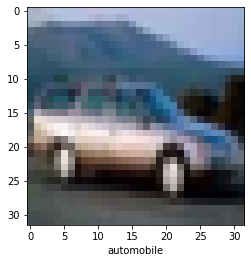

In [ ]:
plot_sample(x_train,Y_train,4)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [ ]:
cnn=models.Sequential([
    #feature extraction
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5385 - accuracy: 0.4423
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1962 - accuracy: 0.5790
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0604 - accuracy: 0.6274
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9776 - accuracy: 0.6576
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9249 - accuracy: 0.6767
Epoch 6/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8771 - accuracy: 0.6934
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8402 - accuracy: 0.7056
Epoch 8/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8046 - accuracy: 0.7202
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7756 - accuracy: 0.7292
Epoch 10/10
1563/1563 [==============================] - 54s 34m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9592 - accuracy: 0.6784


[0.9591622352600098, 0.6783999800682068]

In [ ]:
y_test=y_test.reshape(-1,)

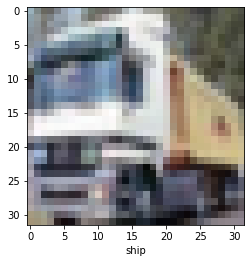

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_pred=cnn.predict(x_test)
y_pred[0]

array([4.5126076e-03, 3.6314447e-04, 4.7042435e-03, 4.8874494e-01,
       5.8962805e-03, 4.8688966e-01, 6.1364202e-03, 3.8866772e-04,
       1.9186320e-03, 4.4546992e-04], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
np.argmax([10,4,45,6])

2

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)